Charger le dataset 

In [ ]:
import pandas as pd

df = pd.read_csv("winequality.csv", sep=";")
df.head()


Q5-Prédire la qualité du vin (bon/mauvais, comme dans la Q4) selon l’acide citrique, l’alcool et la densité 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df["type"] = df["type"].map({"red": 0, "white": 1})
df["type"].value_counts()

df["good_quality"] = (df["quality"] >= 7).astype(int)
df[["quality", "good_quality"]].head()


X = df[["citric acid", "alcohol", "density"]]
y = df["good_quality"]



#Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


#Régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Évaluation du modèle
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

#Coefficients (le plus important)
coeffs = pd.DataFrame({
    "Variable": X.columns,
    "Coefficient": model.coef_[0]
})

coeffs




              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1044
           1       0.61      0.21      0.31       256

    accuracy                           0.82      1300
   macro avg       0.72      0.59      0.60      1300
weighted avg       0.79      0.82      0.78      1300



,Variable,Coefficient
0,citric acid,1.206032
1,alcohol,0.842067
2,density,-0.111472


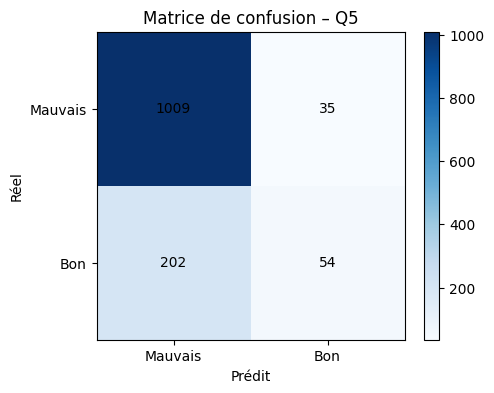

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# calcul de la matrice
cm = confusion_matrix(y_test, y_pred)

# création du graphique
plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues")
plt.title("Matrice de confusion – Q5")
plt.colorbar()

plt.xlabel("Prédit")
plt.ylabel("Réel")

plt.xticks([0, 1], ["Mauvais", "Bon"])
plt.yticks([0, 1], ["Mauvais", "Bon"])

# afficher les valeurs dans les cases
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

# sauvegarde
plt.savefig("confusion_matrix_Q5.png", dpi=300, bbox_inches="tight")

plt.show()
